## Linear Regression With E commerce data 

## Importing The Important Things 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [8]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


There is no missing data within our columns.

In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## EDA

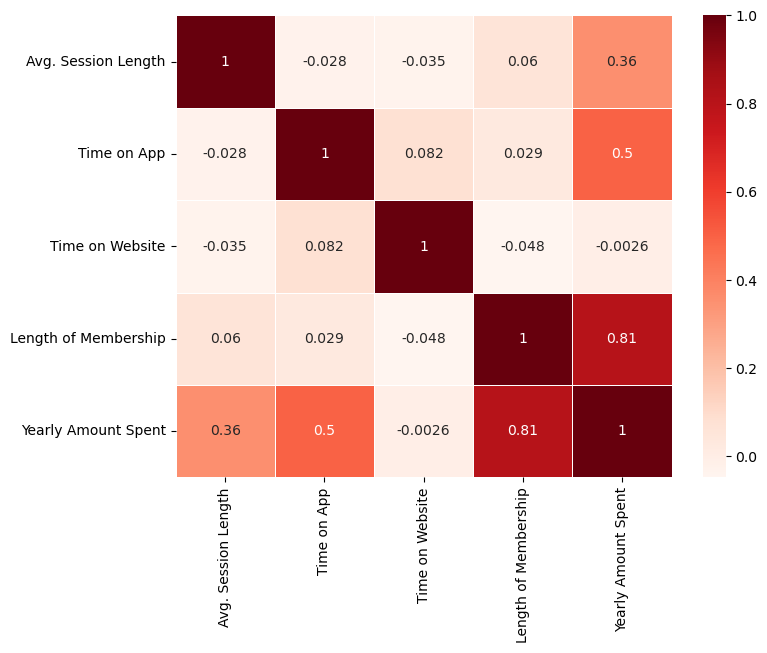

In [13]:
corr_matrix = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,cbar=True, annot=True, cmap='Reds', linewidths=0.5)
plt.show()


Strong relationship: 'Length of Membership' is positively correlated with 'Yearly Amount Spent', suggesting that customers with longer memberships tend to spend more annually. Similarly, a decent relationship with 'Avg. Session Length' indicates that customers who spend more time during each session are also likely to spend more yearly.

Weak relationship: There is no significant correlation between 'Time on Website' and 'Yearly Amount Spent', meaning that there's no clear relationship between the amount of time someone spends on the website and how much they spend, either positively or negatively

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


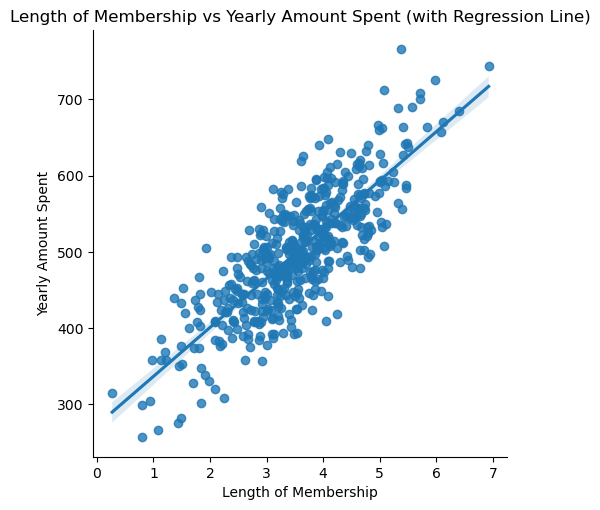

In [14]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.title('Length of Membership vs Yearly Amount Spent (with Regression Line)')
plt.show()


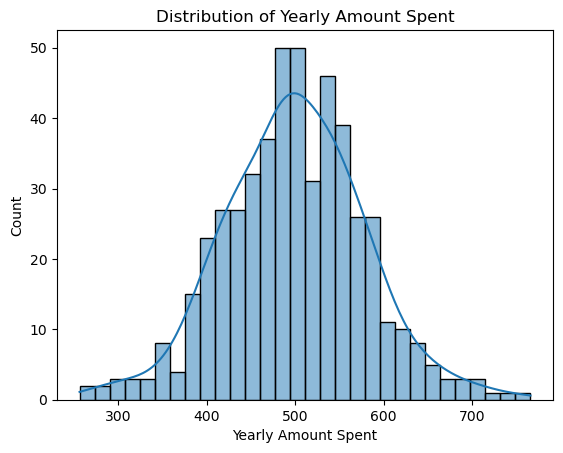

In [16]:
sns.histplot(df['Yearly Amount Spent'], bins=30, kde=True)
plt.title('Distribution of Yearly Amount Spent')
plt.show()



## Spliting Data

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X= df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Modeling

In [27]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
predictions=model.predict(X_test)

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

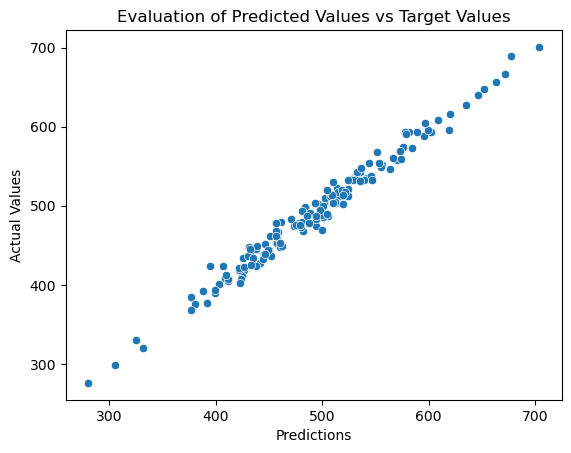

In [38]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Evaluation of Predicted Values vs Target Values")
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
print("Mean absolute error:", mean_absolute_error(y_test,predictions))
print("Mean squared error:", mean_squared_error(y_test,predictions))

Mean absolute error: 8.426091641432073
Mean squared error: 103.9155413650329


Mean Absolute Error (MAE): 8.43
Mean Squared Error (MSE): 103.92
Root Mean Squared Error (RMSE): ≈10.19


The MAE of 8.43 means that,the model's predictions are off by about 8.43 units of yearly spending. When compared to the mean yearly spend of 499.31, this represents a small percentage error (~1.69%), indicating that the model had decent performance.

With an RMSE of 10.19, the model's predictions deviate from the actual values by about 10.19 units on average, which is still relatively small compared to the mean yearly spend.

## Conclusion

This notebook performs a linear regression analysis on an e-commerce dataset to predict 'Yearly Amount Spent'. The process includes data exploration (EDA), model building, and evaluation. The linear regression model demonstrates that customer membership duration is a key factor influencing yearly spending.

Both the MAE and RMSE are small in relation to the average yearly spend. This suggests that the model is reasonably accurate in predicting customer spending. The error values are low enough to be considered good, depending on the business context and the acceptable level of error in predicting customer spending.

Importance of Membership Length:

Key Insight: The length of a customer's membership is the strongest predictor of how much they spend annually. Customers with longer memberships tend to spend significantly more.
Business Strategy: This suggests that customer retention should be a top priority. The company should invest in loyalty programs that reward long-standing members with exclusive discounts, offers, or benefits. Additionally, newer members should be encouraged to build long-term relationships with the business, possibly through tiered membership benefits that increase over time. Fostering loyalty can lead to higher annual spending.
Session Length Matters:

Key Insight: There is a strong relationship between the length of each session a customer spends with a personal stylist and their yearly spending. Customers who spend more time in these sessions tend to spend more overall.
Business Strategy: This finding suggests that the business's model of having customers meet with personal stylists before making purchases is effective, especially for longer sessions. To capitalize on this:
The business could offer longer session durations to customers, potentially enhancing the overall experience.
It’s worth looking into other aspects of the session, such as the quality of customer service, in-store ambiance, and overall customer experience. Improving these aspects could encourage longer sessions and, in turn, increase spending.
Consider offering personalized follow-up sessions or virtual stylist consultations to maintain engagement outside of in-store visits.

Predictive Power for Future Planning:

Key Insight: The model, with relatively low prediction errors (MAE and RMSE), offers accurate forecasts of customer spending based on membership length and session engagement.
Business Strategy: The business can use this model to predict future sales, improve inventory management, and personalize marketing campaigns. For example, customers predicted to spend more can receive tailored recommendations or targeted promotions to further increase their spending.